Import Useful Libraries and Methods

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

Load the Dataset

In [29]:
data = pd.read_csv('Dataset.csv')

Scale the numerical variables

In [30]:
# Scale numerical variables
scaler = StandardScaler()
numerical_vars = ['age', 'bp_1', 'bp_2', 'glucose_1', 'glucose_2', 'bmi_1', 'bmi_2', 'cholesterol_1', 'cholesterol_2', 'heart_rate_1', 'heart_rate_2']
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])
data

,age,gender,bp_1,bp_2,glucose_1,glucose_2,bmi_1,bmi_2,cholesterol_1,cholesterol_2,heart_rate_1,heart_rate_2,anemi_1,anemi_2,health_decline
0,0.309193,M,-0.235760,0.540929,0.021388,0.017770,-1.402341,-1.402482,-0.334625,-0.210321,0.609017,1.150431,No,Yes,1
1,1.447862,F,1.679792,1.989485,2.642928,2.566874,0.496663,0.621690,1.569228,1.671643,-0.517990,-0.421086,Yes,Yes,1
2,0.992394,M,-0.509410,-0.644253,-0.852459,-0.778825,1.688194,1.652177,-1.555965,-1.666180,-0.799742,-0.421086,No,Yes,0
3,-1.512679,F,-2.698612,-2.356183,-0.614137,-0.699165,-1.625754,-1.660104,-1.017138,-1.062531,0.045514,0.626592,No,No,0
4,-1.171078,M,-0.509410,-0.775940,-0.852459,-0.858484,0.384956,0.437674,0.707106,0.819433,-1.363245,-1.206845,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.487876,F,0.174715,0.145869,0.895234,0.894024,0.831781,0.842508,0.635263,0.641889,-0.517990,-0.421086,Yes,Yes,1
126,-0.032408,M,1.542966,1.462738,-0.773018,-0.778825,-1.588518,-1.586498,-1.843339,-1.808215,-1.644997,-1.730684,No,Yes,0
127,0.650793,F,0.448365,0.409242,-0.931899,-0.938144,-1.327871,-1.328876,-1.088982,-1.062531,-1.644997,-1.730684,No,Yes,0
128,-0.829477,M,-0.235760,-0.249192,0.021388,0.017770,0.533898,0.511280,-0.119094,-0.139304,-0.517990,-0.421086,Yes,Yes,1


Preprocess the Data and label encode the categorical features

In [31]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['anemi_1'] = label_encoder.fit_transform(data['anemi_1'])
data['anemi_2'] = label_encoder.fit_transform(data['anemi_2'])
data

,age,gender,bp_1,bp_2,glucose_1,glucose_2,bmi_1,bmi_2,cholesterol_1,cholesterol_2,heart_rate_1,heart_rate_2,anemi_1,anemi_2,health_decline
0,0.309193,1,-0.235760,0.540929,0.021388,0.017770,-1.402341,-1.402482,-0.334625,-0.210321,0.609017,1.150431,0,1,1
1,1.447862,0,1.679792,1.989485,2.642928,2.566874,0.496663,0.621690,1.569228,1.671643,-0.517990,-0.421086,1,1,1
2,0.992394,1,-0.509410,-0.644253,-0.852459,-0.778825,1.688194,1.652177,-1.555965,-1.666180,-0.799742,-0.421086,0,1,0
3,-1.512679,0,-2.698612,-2.356183,-0.614137,-0.699165,-1.625754,-1.660104,-1.017138,-1.062531,0.045514,0.626592,0,0,0
4,-1.171078,1,-0.509410,-0.775940,-0.852459,-0.858484,0.384956,0.437674,0.707106,0.819433,-1.363245,-1.206845,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.487876,0,0.174715,0.145869,0.895234,0.894024,0.831781,0.842508,0.635263,0.641889,-0.517990,-0.421086,1,1,1
126,-0.032408,1,1.542966,1.462738,-0.773018,-0.778825,-1.588518,-1.586498,-1.843339,-1.808215,-1.644997,-1.730684,0,1,0
127,0.650793,0,0.448365,0.409242,-0.931899,-0.938144,-1.327871,-1.328876,-1.088982,-1.062531,-1.644997,-1.730684,0,1,0
128,-0.829477,1,-0.235760,-0.249192,0.021388,0.017770,0.533898,0.511280,-0.119094,-0.139304,-0.517990,-0.421086,1,1,1


Split the dataset into training and testing sets

In [32]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Define and compile the model

In [33]:
model = Sequential()
model.add(Dense(32, input_dim=14, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Fit the model

In [34]:
# Use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="classifier-neural-networks.hdf5", verbose=1, save_best_only=True)

# Fit the keras model on the dataset
results = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1,validation_data=(X_test, y_test),callbacks=[checkpointer, earlystopping])

Epoch 1/100
1/7 [===>..........................] - ETA: 8s - loss: 0.6690 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.67385, saving model to classifier-neural-networks.hdf5
7/7 [==============================] - 2s 57ms/step - loss: 0.6975 - accuracy: 0.5096 - val_loss: 0.6739 - val_accuracy: 0.6923
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7108 - accuracy: 0.5625
Epoch 2: val_loss improved from 0.67385 to 0.66348, saving model to classifier-neural-networks.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.6902 - accuracy: 0.6154 - val_loss: 0.6635 - val_accuracy: 0.6923
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6897 - accuracy: 0.3750
Epoch 3: val_loss improved from 0.66348 to 0.65685, saving model to classifier-neural-networks.hdf5
7/7 [==============================] - 0s 18ms/step - loss: 0.6645 - accuracy: 0.6250 - val_loss: 0.6568 - val_accuracy: 0.7692
Epoch 4/100
1/7 [===>....................

Evaluate the model

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13545459508895874
Test accuracy: 0.9615384340286255


Train and Test accuracy

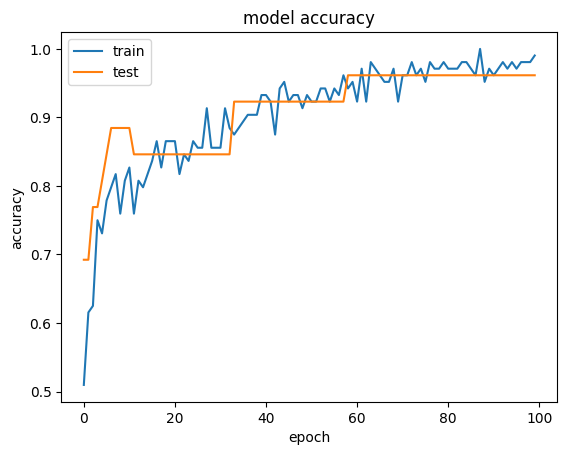

In [36]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train and Test loss

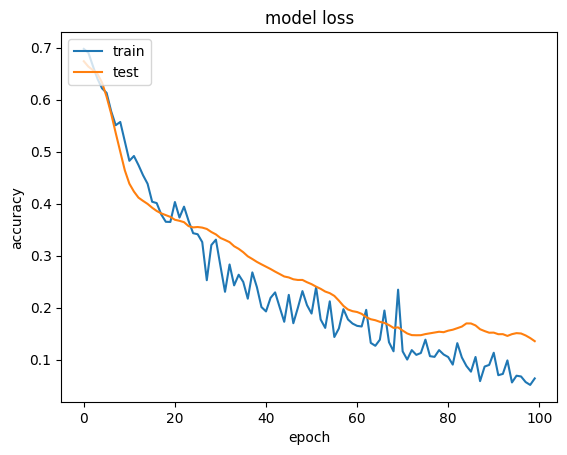

In [37]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving the model

In [38]:
# Save the model architecture to json file for future use

model_json = model.to_json()
with open("classifier-neural-network.json","w") as json_file:
  json_file.write(model_json)